In [1]:
import tensorflow as tf 
import numpy as np 
import sys
from pathlib import Path
from os.path import dirname, abspath
script_dir = Path(dirname(abspath('')))
module_dir = str(script_dir)
sys.path.insert(0, module_dir + '/modules')
sys.path.insert(0, module_dir + '/models')
print(module_dir)
import sde_evolve as se
import drift
import arch

C:\Users\pinak\Documents\GitHub\symmertic_attractor


Time taken by evolve is 60.19785809516907 seconds


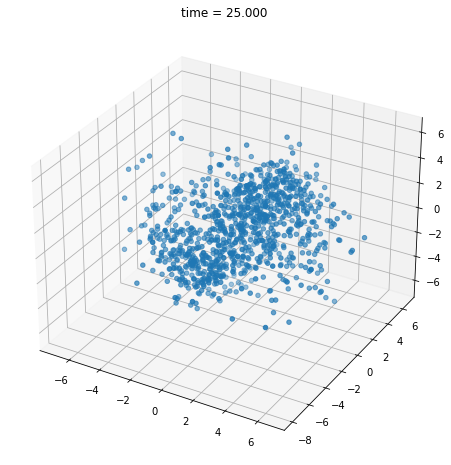

In [2]:
X0 = tf.random.uniform(minval=-1., maxval=1., shape=(1000, 3))
se.evolve(X0, drift.mu_np, sigma=1, dt=0.01, n_steps=2500, saveas='../plots/type1', animate_as='../plots/type1.mp4', idx2plt=[0, 1, 2])

Time taken by evolve is 30.089454174041748 seconds


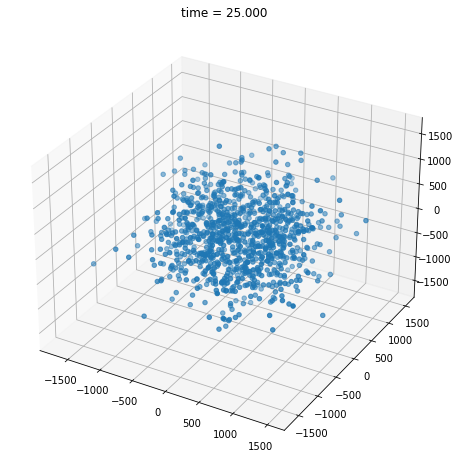

In [2]:
X0 =  tf.random.uniform(minval=-4., maxval=4., shape=(1000, 3))
se.evolve(X0, lambda x: -drift.mu_np(x), sigma=1, dt=0.1, n_steps=250, saveas='../plots/type3', animate_as='../plots/type3.mp4', idx2plt=[0, 1, 2])

In [12]:
np.mean(np.sum(np.load('../plots/type3.npy')[-1]**2, axis=-1)**0.5)

856.09973

Time taken by evolve is 7.430927276611328 seconds


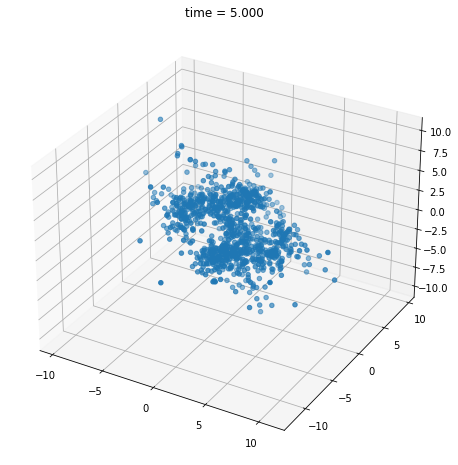

In [4]:
net = arch.LSTMForgetNet(50, 3, tf.float32, name="thomas")
net.load_weights('../data/{}'.format(net.name)).expect_partial()

def mu_np(X, b=0.208186):
    x, y, z = np.split(X, 3, axis=-1)
    p = np.sin(y) - b*x 
    q = np.sin(z) - b*y 
    r = np.sin(x) - b*z
    return np.concatenate([p, q, r], axis=-1) 

def h_mu(X, s=0.5):
    x, y, z = tf.split(X, 3, axis=-1)
    p, q, r = tf.split(mu_np(X), 3, axis=-1)
    with tf.GradientTape() as tape:
        tape.watch([x, y, z])
        log_n_theta = net(x, y, z)
    p1, q1, r1 = tape.gradient(log_n_theta, [x, y, z])
    return tf.concat([p1*s**2 - p, q1*s**2 - q, r1*s**2 - r], axis=-1).numpy()

X0 =  tf.random.uniform(minval=-1., maxval=1., shape=(1000, 3))
se.evolve(X0, h_mu, sigma=0.5, dt=0.1, n_steps=50, saveas='../plots/type2', animate_as='../plots/type2.mp4', idx2plt=[0, 1, 2])